The data is already be cleaned and processed last week. I create a new csv file and storge them. So, I will read that file instead.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Sud uqsetion: What is the probability that the total steps for a week is lower than recommended. As doctors generally consider fewer than 6500 steps per day to be sedentary.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weeksteps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps.csv", sep=",")
weeksteps.head() #There should be a variable to storage data read from the csv file.

,Week,Steps (count)
0,1,51120.0
1,2,48034.0
2,3,43866.0
3,4,52397.0
4,5,50535.0


Briefly draw a graph showing trends and patterns in the data.

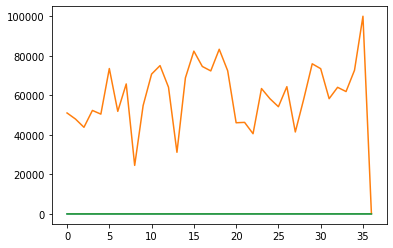

In [ ]:
plt.plot(weeksteps) #To be honest, this was temporarily added for the question of MCQ. I deliberately unlabelled it.

The steps data for September is not complete. It must will be a outlier, so drop it.

In [ ]:
weeksteps.drop([36]).head()

,Week,Steps (count)
0,1,51120.0
1,2,48034.0
2,3,43866.0
3,4,52397.0
4,5,50535.0


Steps data should be integer, so change it to integer

In [ ]:
weeksteps['Steps (count)'] = weeksteps['Steps (count)'].astype('int') # We also need integer data for following logistic regression.

In [ ]:
weeksteps.insert(2,'Sedentary','') # Add a new column for sedentary.

Let's check wheather sedentary.

In [ ]:
for n in range(0,len(weeksteps)):
  if weeksteps['Steps (count)'][n] >= 7000*7: # The data is about total weekly steps, so recommended steps should be multipied by 7.
    weeksteps['Sedentary'][n] = 0
  else:
    weeksteps['Sedentary'][n] = 1

In [ ]:
print(weeksteps.dtypes)

Week              int64
Steps (count)     int64
Sedentary        object
dtype: object


For the following logistic regresion, I change sedenary to integer.

In [ ]:
weeksteps['Sedentary'] = weeksteps['Sedentary'].astype('int')

In [ ]:
print(weeksteps.dtypes)

Week             int64
Steps (count)    int64
Sedentary        int64
dtype: object


In [ ]:
x = weeksteps.drop(columns='Sedentary')
y = weeksteps['Sedentary']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.7, random_state=1) # I selected 30% of data for testing. Temporarily do not set random sampling.

In [ ]:
model = LogisticRegression()
model = model.fit(x_train, y_train)
model

LogisticRegression()

In [ ]:
coef = model.coef_
coef

array([[ 7.60388829e-02, -4.36643576e-05]])

In [ ]:
y_prd = model.predict(x_test)
y_prd[:20] # Get the prediction of sedentary.

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
a = pd.DataFrame()
a['Predicted'] = list(y_prd)
a['Actual'] = list(y_test)
a.head()

,Predicted,Actual
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0


Calculate accuracy.

In [ ]:
acc = model.score(x_test, y_test)
acc

0.8076923076923077

The accuracy is 80%, not bad.

Predict accuracy.

In [ ]:
y_prd_acc = model.predict_proba(x_test)
acc_table = pd.DataFrame(y_prd_acc, columns = ['Probability of not sedentary','Probability of sedentary'])
acc_table

,Probability of not sedentary,Probability of sedentary
0,0.843231,0.156769
1,0.737541,0.262459
2,0.878572,0.121428
3,0.504956,0.495044
4,0.595935,0.404065
5,0.420181,0.579819
6,0.585747,0.414253
7,0.835949,0.164051
8,0.837482,0.162518
9,0.655009,0.344991


Now, I will use other data set to check wheather the model is good.(05)

In [ ]:
p5data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-05-detail.csv", sep=",")
p5data.dropna() #There should be a variable to storage data read from the csv file.

,Source,Date,Hour,Count
0,person5,2022-01-27,8,4
1,person5,2022-01-02,13,78
2,person5,2022-01-02,12,66
3,person5,2022-01-02,12,57
4,person5,2022-01-02,12,99
...,...,...,...,...
12132,person5,2022-09-01,19,59
12133,person5,2022-09-01,19,102
12134,person5,2022-09-01,19,15
12135,person5,2022-09-01,21,35


In [ ]:
p5data.sort_values(by='Date') #Ensure the data are in the correct order.
p5data = p5data.drop(['Source'], axis=1)
p5data

,Date,Hour,Count
0,2022-01-27,8,4
1,2022-01-02,13,78
2,2022-01-02,12,66
3,2022-01-02,12,57
4,2022-01-02,12,99
...,...,...,...
12132,2022-09-01,19,59
12133,2022-09-01,19,102
12134,2022-09-01,19,15
12135,2022-09-01,21,35


Group the time by weeks.

In [ ]:
p5data.insert(0,'Week','')

In [ ]:
p5data.groupby('Date')['Count'].sum()

Date
2022-01-01      114
2022-01-02     8681
2022-01-03     5104
2022-01-04     8031
2022-01-05     7743
              ...  
2022-08-28    12888
2022-08-29     6036
2022-08-30     9820
2022-08-31    10523
2022-09-01     6801
Name: Count, Length: 222, dtype: int64

In [ ]:
p5data['Date'].replace('-','',regex=True,inplace=True)
p5data['Date'] = pd.to_datetime(p5data['Date'], format='%Y%m%d')

In [ ]:
p5data['Week'] = p5data['Date'].dt.isocalendar().week # Calculate the wrrk number by python method.
p5data

,Week,Date,Hour,Count
0,4,2022-01-27,8,4
1,52,2022-01-02,13,78
2,52,2022-01-02,12,66
3,52,2022-01-02,12,57
4,52,2022-01-02,12,99
...,...,...,...,...
12132,35,2022-09-01,19,59
12133,35,2022-09-01,19,102
12134,35,2022-09-01,19,15
12135,35,2022-09-01,21,35


In [ ]:
A = p5data.groupby('Week')['Count'].sum()

In [ ]:
A.to_csv("/content/drive/MyDrive/Colab Notebooks/weeks_and_steps_05.csv",index=False,sep=',')

In [ ]:
weeksteps05 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weeks_and_steps_05.csv", sep=",")
weeksteps05.head() #There should be a variable to storage data read from the csv file.

,Count
0,32533
1,347
2,4
3,24943
4,48152


In [ ]:
weeksteps05.insert(0,'Week','')

In [ ]:
for n in range(0,len(weeksteps05)): 
  weeksteps05['Week'][n] = n+1 # Mark week numbers
weeksteps05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Week,Count
0,1,32533
1,2,347
2,3,4
3,4,24943
4,5,48152
5,6,35990
6,7,49512
7,8,50478
8,9,64540
9,10,61896


In [ ]:
weeksteps05.insert(2,'sedentary','')

In [ ]:
weeksteps05['Count'] = weeksteps05['Count'].astype('int')

In [ ]:
for a in range(0,len(weeksteps05)):
  if weeksteps05['Count'][a] >= 7000*7:
    weeksteps05['sedentary'][a] = 0
  else:
    weeksteps05['sedentary'][a] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
weeksteps05 = weeksteps05.drop([1])# Drop rows with incorrect values
weeksteps05.head()

,Week,Count,sedentary
0,1,32533,1
3,4,24943,1
4,5,48152,1
5,6,35990,1
6,7,49512,0


In [ ]:
weeksteps05

,Week,Count,sedentary
0,1,32533,1
3,4,24943,1
4,5,48152,1
5,6,35990,1
6,7,49512,0
7,8,50478,0
8,9,64540,0
9,10,61896,0
10,11,90738,0
11,12,77896,0


In [ ]:
weeksteps05['Week'] = weeksteps05['Week'].astype('int') # Change 
weeksteps05['sedentary'] = weeksteps05['sedentary'].astype('int')

In [ ]:
X = weeksteps05.drop(columns='sedentary')
Y = weeksteps05['sedentary']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.7, random_state=1) # I selected 30% of data for testing. Temporarily do not set random sampling.

In [ ]:
model05 = LogisticRegression()
model05 = model05.fit(X_train, Y_train)

In [ ]:
Y_prd = model05.predict(X_test)
Y_prd[:20] # Get the prediction of sedentary.

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
A = pd.DataFrame()
A['Predicted'] = list(Y_prd)
A['Actual'] = list(Y_test)
A.head()

,Predicted,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [ ]:
acc05 = model.score(X_test, Y_test)
acc05

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Count
Feature names seen at fit time, yet now missing:
- Steps (count)

  warnings.warn(message, FutureWarning)


0.8260869565217391

The accuracy is 82.6% which is similar to the last result with data set 08.

In [355]:
Y_prd_acc = model05.predict_proba(X_test)
Acc_table = pd.DataFrame(Y_prd_acc, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table

,Probability of not sedentary,Probability of sedentary
0,0.671900,0.328100
1,0.817620,0.182380
2,0.741083,0.258917
3,0.898250,0.101750
4,0.699750,0.300250
5,0.827078,0.172922
6,0.990599,0.009401
7,0.405878,0.594122
8,0.946499,0.053501
9,0.741931,0.258069
